In [2]:
import pylab as plt
from bs4 import BeautifulSoup
from collections import Counter
from nltk.tokenize import word_tokenize
import requests
import json
import os
import csv
import re

In [3]:
relativePath = os.getcwd()
apiKey=os.environ['api_key']
#considering sample dataset
year = 2017
month = 1

url = "https://api.nytimes.com/svc/archive/v1/"+str(year)+"/"+str(month)+".json?api-key="+apiKey
response = requests.get(url)
content  = response.json()

with open(relativePath+"/"+'Midterm/data/jsonData_NY'+"/"+str(month)+"-"+str(year)+'.json', 'w') as file:
    json.dump(content, file)

In [4]:
path = relativePath+"/"+'midterm/data/jsonData_NY'
#Analysisng the data
def getArticles(file, category):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        section = config['response']['docs'][x]['subsection_name']
        category.append(section)

    #we have to append all the article to list
    

category = []
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getArticles(os.path.join(directory, file), category)

print(len(category))

fcount={} 
#by looping we are getting the count of every word and storing in Dictionary.

for word in category:
    count = fcount.get(word,0)
    fcount[word] = count + 1

sortedDict = sorted(fcount.items(), key=lambda x: (-x[1], x[0])) 
print(sortedDict[:10])


i = 0
oredering = []

for rank in range(len(sortedDict)):
    obj1 = sortedDict[rank]
    obj1 = obj1 + (i,)
    oredering.append(obj1) 
    i = i+1

fileName = relativePath+"/"+'midterm/TopTitles.csv'
#loading the data in our disk
with open(fileName, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["Category", "Count"])
    a.writerows(oredering[:10])


label = []
y = []
z = []

with open(fileName,'r') as csvfile:
    next(csvfile)
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        label.append(row[0])
        y.append(int(row[1]))
        z.append(int(row[2]))
        

pieFig = relativePath+"/"+'midterm/TopTitlesAnalysis.png'


30542
[(None, 18402), ('Politics', 1361), ('Asia Pacific', 810), ('Europe', 670), ('Music', 536), ('Dealbook', 522), ('Pro Football', 510), ('Middle East', 509), ('College Football', 352), ('Television', 349)]


In [5]:
def getValue(file, keyWords):
    config = json.loads(open(file).read())
    for x in range(len(config['response']['docs'])):
        headline = config['response']['docs'][x]['headline']['main']
        #collecting the data with polical headlines
        if 'Politics' in headline:
            for y in range(len(config['response']['docs'][x]['keywords'])):
                val = config['response']['docs'][x]['keywords'][y]['value']
                keyWords.append(val)
keyWords = [] 
for directory, subDirectory, filename in os.walk(path):
    for file in filename:
        getValue(os.path.join(directory, file), keyWords)

In [6]:
#writing the uniques words to txt file.
with open(relativePath+"/"+'midterm/keyWords.txt', "w") as f:
    for uniq in keyWords:
        f.write(uniq)
        f.write("\n")

In [7]:
with open(relativePath+"/"+'midterm/keyWords.txt', "r") as f:
    data = f.readlines()
unique_words = {} 
for word in data: 
    word = word.replace("\n", "")
    if word in unique_words:
        unique_words[word] += 1
    else:
        unique_words[word] = 1
        
sortedDict = sorted(unique_words.items(), key=lambda x: (-x[1], x[0]))
    
newList = sortedDict[1:11]
print(newList)

[('Obama, Barack', 22), ('Democratic Party', 13), ('Midterm Elections (2014)', 12), ('Politics and Government', 12), ('News', 11), ('Republican Party', 11), ('Trump, Donald J', 11), ('House of Representatives', 6), ('United States Economy', 6), ('Clinton, Hillary Rodham', 5)]


In [8]:
i = 1#ranking the words
newKeyWordList = []

for rank in range(len(newList)):
    obj1 = newList[rank]
    obj1 = obj1 + (i,)
    newKeyWordList.append(obj1)
    i = i+1

In [9]:
#saving the output csv files
fileNameNew = relativePath+"/"+'midterm/Politics.csv'

with open(fileNameNew, 'w', newline='') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerow(["KeyWords", "Count", "Rank"])
    a.writerows(newKeyWordList)
# graphicalRepresentation of the politics and titles
key = []
count = []
rank = []

# plotting log-log figure
with open(fileNameNew,'r') as csvfile:
    next(csvfile)
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        if 'Trump, Donald J' in row or 'Clinton, Hillary Rodham' in row:
            key.append(str((row[0])))
            count.append(int(row[1]))
            rank.append(int(row[2]))

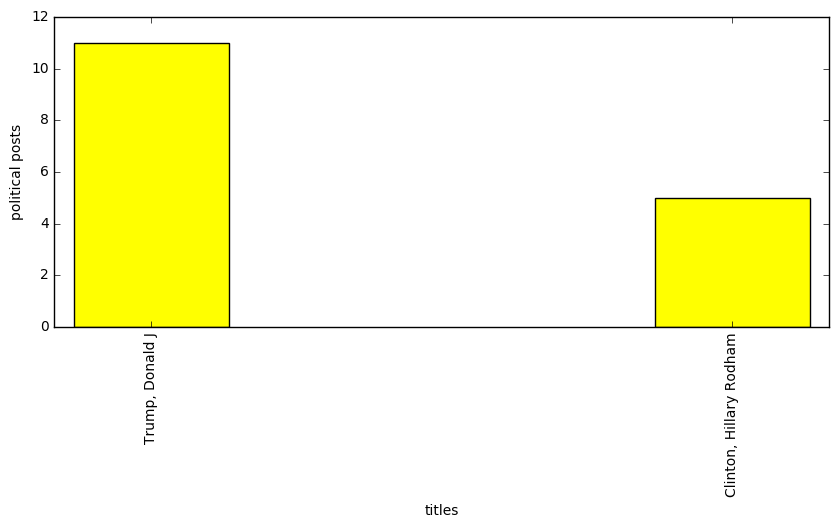

In [13]:
# Plotting bar graph showing sub categories.
exportFig = relativePath+"/"+'midterm/Politics.png'
plt.figure(figsize=(10,4))
plt.bar(rank, count, align='center', color='yellow')
plt.xticks(rank, key, rotation=90)
plt.xlabel("titles")
plt.ylabel("political posts")
plt.savefig(exportFig, bbox_inches='tight')
plt.show()